# Assignment 2:

# H20 AUTOML



*   **Name: Apoorv Dhaygude**
*   **NUID: 002207325**



# ABSTRACT

The data analysts at BigMart have collected sales data of Fiscal Year 2013 for different products across multiple stores. The collected data includes some imporatant attributes of the product like fat content, weight, visibility etc.

# AIM:

To Analyze the raw data collected by the data analysts at BigMart and check the correlationship, multicollinearity, significant between variables, then use AutoML which belongs to H2O.ai to train the data and predict in 10 different models, finally print the best model's performance.

# VARIABLE DESCRIPTION:

Item_Identifier: Unique product ID

Item_Weight: Weight of product

Item_Fat_Content: Whether the product is low fat or not

Item_Visibility: The % of total display area of all products in a store allocated to the particular product

Item_Type: The category to which the product belongs

Item_MRP: Maximum Retail Price (list price) of the product

Outlet_Identifier: Unique store ID

Outlet_Establishment_Year: The year in which store was established

Outlet_Size: The size of the store in terms of ground area covered

Outlet_Location_Type: The type of city in which the store is located

Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

# Importing required Libraries and H20 Initialization

In [ ]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o


Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=2c721648601c44cfca7a04a110c5fc173725d15f641b85106e0ce6be57bc18e7
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split as tts
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [ ]:
min_mem_size=6
run_time=222

In [ ]:
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:51085..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpvic61odt
  JVM stdout: /tmp/tmpvic61odt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpvic61odt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:51085
Connecting to H2O server at http://127.0.0.1:51085 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 29 days
H2O_cluster_name:,H2O_from_python_unknownUser_s59huf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Import the processed data from notebook One
url = "https://raw.githubusercontent.com/apoorv1811/DataScience/main/BigMart.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Studying the Data

In [ ]:
df.describe()

Rows:8523
Cols:11

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
type,real,int,real,real,real,real,real,real,real,real,real
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,0.49524129586825366,0.3526927138331573,0.20138200879687781,0.48177871641440795,0.4656346646589141,0.5246978763346238,0.6387422269154054,0.5564355273964566,0.40040674253979436,0.1645512812664088,0.5346611130666039
maxs,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
sigma,0.25918860615154027,0.47783611520511116,0.1571231565162847,0.280665990848366,0.2643272047356453,0.31524458859168947,0.3278848668059756,0.4063787497600585,0.26548639958804937,0.13072944146990953,0.34882335033719397
zeros,4,5517,526,648,1,555,978,2388,1083,2,1463
missing,0,0,0,0,0,0,0,0,0,0,0
0,0.28252456088121464,0.0,0.04886645352965088,0.26666666666666666,0.9275071477565212,1.0,0.5,0.0,0.3333333333333333,0.2835866571457717,0.5833333333333334
1,0.08127418874665077,1.0,0.05870507733970792,0.9333333333333332,0.07206840114364105,0.3333333333333333,0.5,1.0,0.6666666666666666,0.031418953381617876,1.0
2,0.7707651086632927,0.0,0.051036957937098795,0.6666666666666666,0.46828840942892647,1.0,0.5,0.0,0.3333333333333333,0.1581148627971029,0.5833333333333334


In [ ]:
df.types

{'Item_Weight': 'real',
 'Item_Fat_Content': 'int',
 'Item_Visibility': 'real',
 'Item_Type': 'real',
 'Item_MRP': 'real',
 'Outlet_Identifier': 'real',
 'Outlet_Size': 'real',
 'Outlet_Location_Type': 'real',
 'Outlet_Type': 'real',
 'Item_Outlet_Sales': 'real',
 'Outlet_Age': 'real'}

In [ ]:
df.shape

(8523, 11)

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(6818, 11)
(1705, 11)


In [ ]:
#Display all columns in X
X=df.columns
print(X)

['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age']


In [ ]:
#Seperate Dependent variable from Independent variable
y_numeric ='Item_Outlet_Sales'
X.remove(y_numeric)
print(X)

['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Age']


In [ ]:
dfpd=pd.read_csv("https://raw.githubusercontent.com/apoorv1811/DataScience/main/BigMart.csv")

# H20 AutoML Execution

In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
#pass the data through H20AutoML
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/31
# GBM base models (used / total),3/13
# XGBoost base models (used / total),2/12
# DeepLearning base models (used / total),2/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
print(aml.leaderboard)

model_id                                                     rmse         mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20240219_15204     0.0826005  0.00682285  0.057874   0.0656902                0.00682285
StackedEnsemble_AllModels_2_AutoML_1_20240219_15204     0.0826788  0.00683578  0.0579268  0.0657751                0.00683578
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_15204  0.0826816  0.00683624  0.0578298  0.0657347                0.00683624
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_15204  0.0827086  0.00684072  0.0579646  0.0658057                0.00684072
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_15204  0.0827827  0.00685298  0.058023   0.0658603                0.00685298
GBM_grid_1_AutoML_1_20240219_15204_model_2              0.0827861  0.00685354  0.0580157  0.0657533                0.00685354
GBM_1_AutoML_1_20240219_15204                           0.0828147  0.00685828  0.0581068  0.0658314                0.0

In [ ]:
dfpd.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

# Analysing relation between all variables

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type','Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,Item_Weight,4.284835
1,Item_Fat_Content,1.548487
2,Item_Visibility,2.658034
3,Item_Type,3.750801
4,Item_MRP,6.530265
5,Outlet_Identifier,9.709982
6,Outlet_Size,6.132723
7,Outlet_Location_Type,8.676892
8,Outlet_Type,9.105014
9,Item_Outlet_Sales,5.287580


In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('Item_Outlet_Sales ~ Item_Weight + Item_Fat_Content + Item_Visibility +Item_Type + Item_MRP + Outlet_Identifier + Outlet_Size + Outlet_Location_Type + Outlet_Type + Outlet_Age ', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     891.6
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:06:41   Log-Likelihood:                 8301.8
No. Observations:                8523   AIC:                        -1.658e+04
Df Residuals:                    8512   BIC:                        -1.650e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0171      0.007     -2.602      0.009      -0.030      -0.004
Item_Weight             -0.0008      0.004     -0.216      0.829      -0.008       0.007
Item_Fat_Content         0.0043      0.002      2.055      0.040       0.000       0.008
Item_Visibility         -0.0333      0.007     -5.121      0.000      -0.046      -0.021
Item_Type               -0.0012      0.004     -0.323      0.746      -0.008       0.006
Item_MRP                 0.2808      0.004     74.877      0.000       0.273       0.288
Outlet_Identifier        0.0442      0.006      6.895      0.000       0.032       0.057
Outlet_Size             -0.0466      0.004    -12.878      0.000      -0.054      -0.039
Outlet_Location_Type    -0.0227      0.006     -4.017      0.000      -0.034      -0.012
Outlet_Type              0.1876      0.006     30.919      0.000       0.176       0.200
Outlet_Age               0.0021      0.003      0.690      0.490      -0.004       0.008
==============================================================================
Omnibus:                      853.206   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1781.341
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       4.837   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As seen from the OLS summary p-value for 'Item_Weight' ,'Item_Type' and 'Outlet_Age' is greater than 0.05. Dropping them will give us a model with all variables whose p-values are less than 0.05. The accuracy for this model is 51.2%. Now will check VIF and p-values again for the selected independent variables.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = dfpd[['Item_Fat_Content', 'Item_Visibility','Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Outlet_Sales']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,Item_Fat_Content,1.530182
1,Item_Visibility,2.623136
2,Item_MRP,6.413398
3,Outlet_Identifier,8.049579
4,Outlet_Size,5.429195
5,Outlet_Location_Type,6.691498
6,Outlet_Type,8.759975
7,Item_Outlet_Sales,5.286067


In [ ]:
import statsmodels.formula.api as smf #OLS model Library
results = smf.ols('Item_Outlet_Sales ~ Item_Fat_Content + Item_Visibility + Item_MRP + Outlet_Identifier + Outlet_Size + Outlet_Location_Type + Outlet_Type  ', data=dfpd).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     1274.
Date:                Mon, 19 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:14:47   Log-Likelihood:                 8301.5
No. Observations:                8523   AIC:                        -1.659e+04
Df Residuals:                    8515   BIC:                        -1.653e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0175      0.006     -2.929      0.003      -0.029      -0.006
Item_Fat_Content         0.0044      0.002      2.132      0.033       0.000       0.008
Item_Visibility         -0.0338      0.006     -5.226      0.000      -0.046      -0.021
Item_MRP                 0.2807      0.004     74.944      0.000       0.273       0.288
Outlet_Identifier        0.0446      0.006      7.000      0.000       0.032       0.057
Outlet_Size             -0.0460      0.004    -13.064      0.000      -0.053      -0.039
Outlet_Location_Type    -0.0222      0.006     -3.964      0.000      -0.033      -0.011
Outlet_Type              0.1871      0.006     31.101      0.000       0.175       0.199
==============================================================================
Omnibus:                      849.988   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1769.566
Skew:                           0.639   Prob(JB):                         0.00
Kurtosis:                       4.830   Cond. No.                         17.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
dfpd1=dfpd.drop(['Item_Weight','Item_Type','Outlet_Age'], axis=1)


In [ ]:
dfpd1

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.0,0.048866,0.927507,1.000000,0.5,0.0,0.333333,0.283587
1,1.0,0.058705,0.072068,0.333333,0.5,1.0,0.666667,0.031419
2,0.0,0.051037,0.468288,1.000000,0.5,0.0,0.333333,0.158115
3,1.0,0.000000,0.640093,0.000000,1.0,1.0,0.000000,0.053555
4,0.0,0.000000,0.095805,0.111111,0.0,1.0,0.333333,0.073651
...,...,...,...,...,...,...,...,...
8518,0.0,0.172914,0.777729,0.111111,0.0,1.0,0.333333,0.210293
8519,1.0,0.143069,0.326263,0.777778,0.5,0.5,0.333333,0.039529
8520,0.0,0.107148,0.228492,0.666667,1.0,0.5,0.333333,0.088850
8521,1.0,0.442219,0.304939,0.333333,0.5,1.0,0.666667,0.138835


In [ ]:
#Calculating correlation matrix for all variables
dfpd1.corr()

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,1.000000,0.047314,0.006063,0.000764,-0.000044,-0.001598,0.002199,0.018719
Item_Visibility,0.047314,1.000000,-0.001315,-0.100439,0.114868,-0.028099,-0.173468,-0.128625
Item_MRP,0.006063,-0.001315,1.000000,0.003319,-0.001551,0.000232,-0.001975,0.567574
Outlet_Identifier,0.000764,-0.100439,0.003319,1.000000,0.334633,-0.716176,0.099873,0.162325
Outlet_Size,-0.000044,0.114868,-0.001551,0.334633,1.000000,-0.490952,-0.321476,-0.173185
Outlet_Location_Type,-0.001598,-0.028099,0.000232,-0.716176,-0.490952,1.000000,0.467219,0.089367
Outlet_Type,0.002199,-0.173468,-0.001975,0.099873,-0.321476,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.018719,-0.128625,0.567574,0.162325,-0.173185,0.089367,0.401522,1.000000


Text(0.5, 1.0, 'Variable Correlation')

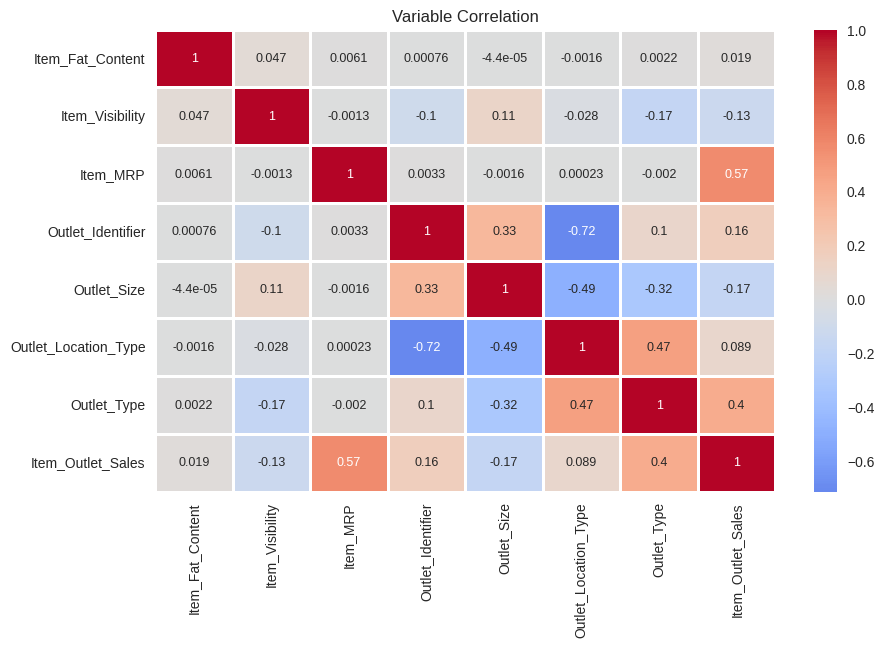

In [ ]:

#Representing Matrix as a plot
from IPython.core.pylabtools import figsize
f,ax=plt.subplots(figsize=(10,6))

sns.heatmap(dfpd1.corr(),center=0, linewidths=0.8,cmap='coolwarm',annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# H20 AutoML Rexecution on new model

In [ ]:
df1=df.drop(['Item_Weight','Item_Type','Outlet_Age'], axis=1)

In [ ]:
df1_train, df1_test = df1.split_frame([pct_rows])

In [ ]:
X1=df1.columns
print(X1)

['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']


In [ ]:
#Seperate Dependent variable from Independent variable
y1_numeric ='Item_Outlet_Sales'
X1.remove(y1_numeric)
print(X1)

['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
aml1 = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [ ]:
aml1.train(x=X1,y=y1_numeric,training_frame=df1_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),11/46
# GBM base models (used / total),5/19
# XGBoost base models (used / total),3/21
# DeepLearning base models (used / total),2/3
# DRF base models (used / total),1/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [ ]:
print(aml1.leaderboard)

model_id                                                     rmse         mse        mae      rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_2_20240219_22936     0.0827168  0.00684207  0.0580212  0.0659419                0.00684207
StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_22936  0.0827557  0.00684851  0.0579235  0.0659577                0.00684851
StackedEnsemble_AllModels_2_AutoML_2_20240219_22936     0.0827589  0.00684904  0.0579676  0.0659626                0.00684904
GBM_grid_1_AutoML_2_20240219_22936_model_2              0.0828325  0.00686122  0.0580512  0.0659846                0.00686122
StackedEnsemble_BestOfFamily_3_AutoML_2_20240219_22936  0.0828616  0.00686605  0.0581386  0.0660548                0.00686605
StackedEnsemble_BestOfFamily_2_AutoML_2_20240219_22936  0.08292    0.00687573  0.058279   0.0660976                0.00687573
StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_22936  0.0829338  0.00687801  0.0582892  0.0661108                0.0

In [ ]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml1_leaderboard_df1=aml1.leaderboard.as_data_frame()
models_dict={}
for m in aml1_leaderboard_df1['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml1_leaderboard_df1['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


{'StackedEnsemble_AllModels_3_AutoML_2_20240219_22936': 0,
 'StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_22936': 1,
 'StackedEnsemble_AllModels_2_AutoML_2_20240219_22936': 2,
 'GBM_grid_1_AutoML_2_20240219_22936_model_2': 3,
 'GLM_1_AutoML_2_20240219_22936': 44}

In [ ]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml1.leaderboard[model_index,'model_id'])

3


In [ ]:
best_model1.algo

'gbm'

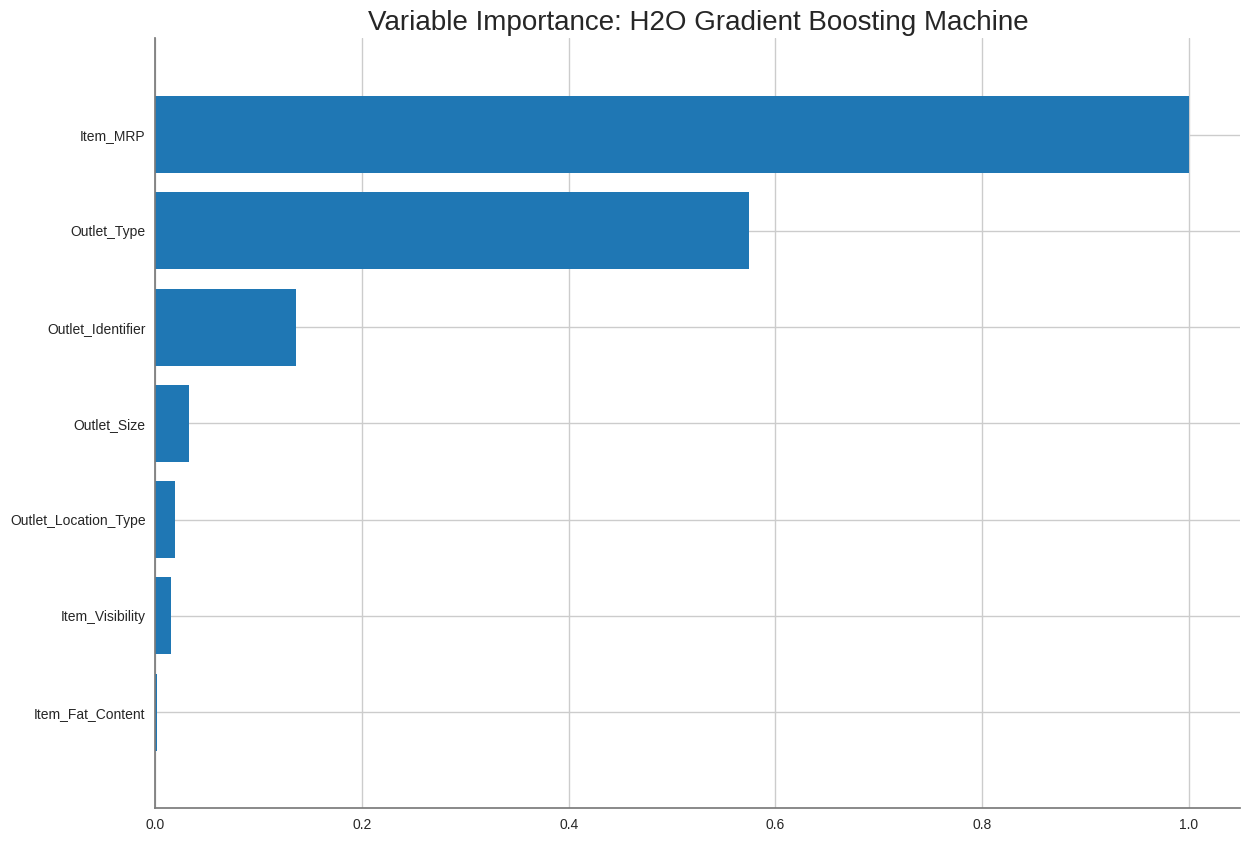

<Figure size 800x550 with 0 Axes>

In [ ]:
#plot variables in order of their importance for price prediction
if best_model1.algo in ['gbm','drf','xrt','xgboost']:
    best_model1.varimp_plot()

44
glm


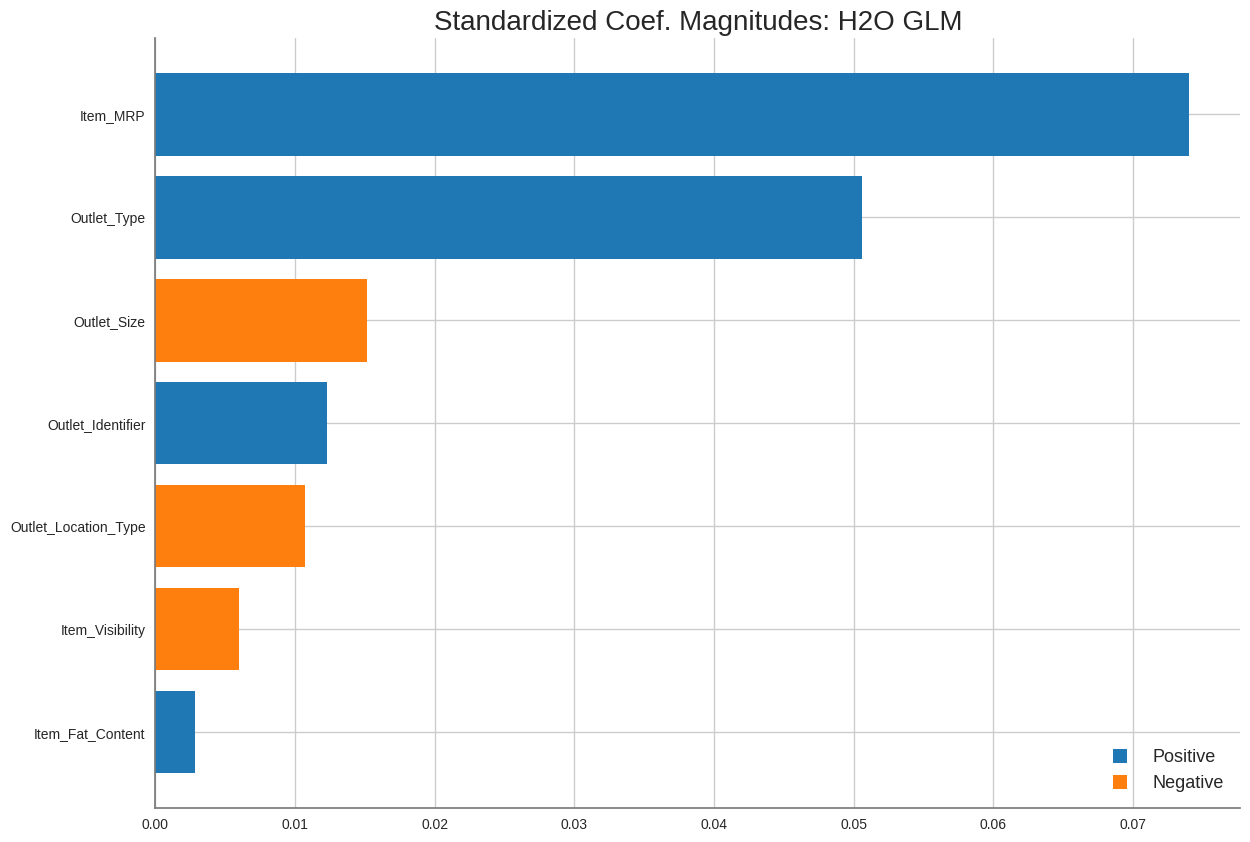

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model1=h2o.get_model(aml1.leaderboard[glm_index,'model_id'])
  print(glm_model1.algo)
  glm_model1.std_coef_plot()

In [ ]:
df1.columns

['Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_2_20240219_22936_model_2 on column 'Item_Fat_Content'.
item_fat_content    mean_response    stddev_response    std_error_mean_response
------------------  ---------------  -----------------  -------------------------
0                   0.164197         0.0994894          0.00107766
1                   0.165165         0.0995838          0.00107868,
 PartialDependence: Partial Dependence Plot of model GBM_grid_1_AutoML_2_20240219_22936_model_2 on column 'Item_Visibility'.
item_visibility    mean_response    stddev_response    std_error_mean_response
-----------------  ---------------  -----------------  -------------------------
0                  0.165615         0.10097            0.00109369
0.0526316          0.167455         0.101096           0.00109506
0.105263           0.165935         0.100394           0.00108745
0.157895           0.164424         0.100236           0.00108574
0.210526           0.164711 

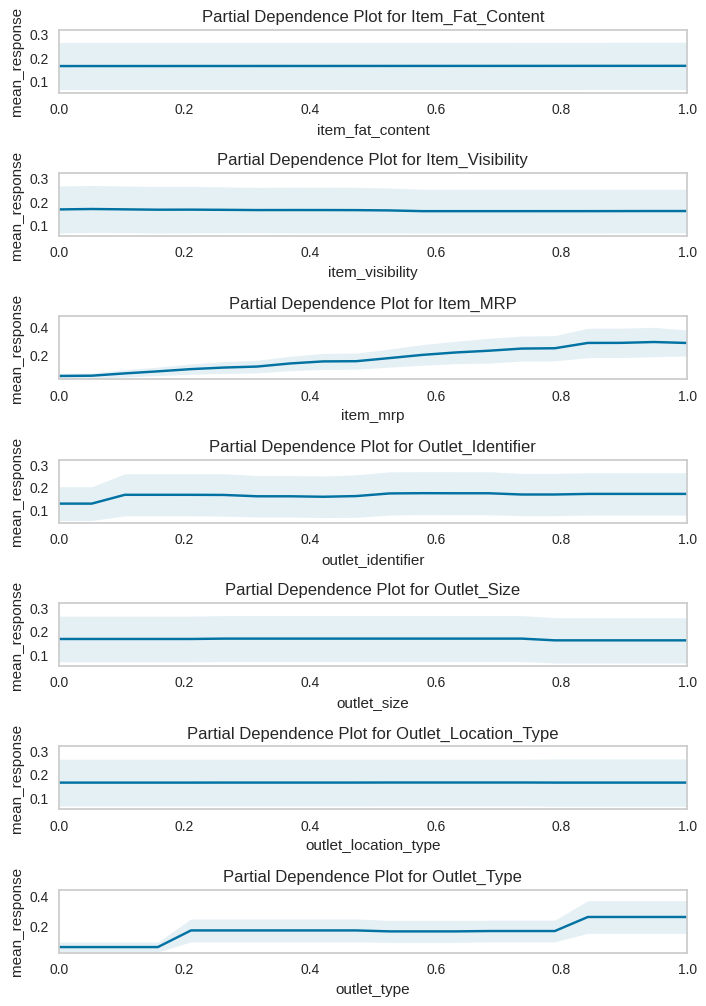

In [ ]:
best_model1.partial_plot(df1, cols=['Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])


# Checking if assumptions violated

For linear regression some of the assumptions are:

*   There needs to be linear relation between the independent and dependent variable.
*   Homoscedasticity which means normality of the error distribution.The plot for residuals against target variable should be normally distributed.
*   
Thirdly, linear regression assumes that there is little or no multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other.  
*   There should be no or little auto correlation. One way to test this is by Durbin-Watson test. The values should be brtween 1.5-2.5 for no autocorrelation.

In [ ]:
A=dfpd1.drop(['Item_Outlet_Sales'],axis=1)
B=dfpd1['Item_Outlet_Sales']

In [ ]:
A_train,A_test,b_train,b_test=tts(A,B,test_size=0.2,random_state=42)


In [ ]:
dfpd.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [ ]:
cols1 = [ 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
model1 = sm.OLS(b_train,sm.add_constant(A_train[cols1])).fit()

In [ ]:
b_pred = model1.predict(sm.add_constant(A_train[cols1]))


In [ ]:
residuals = b_train-b_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 7.164830314389394e-16


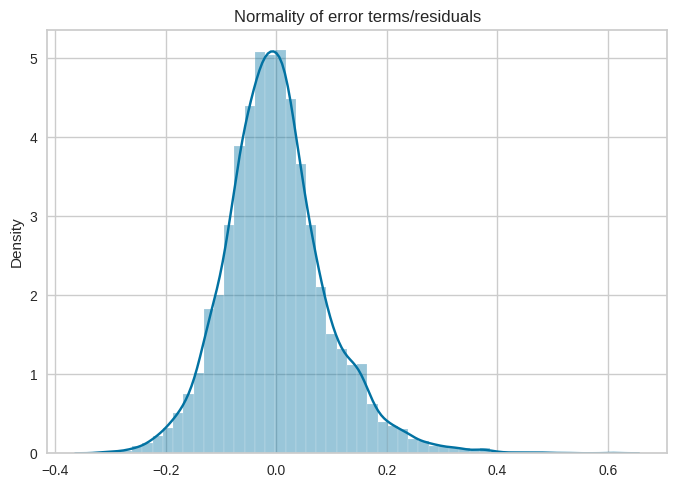

In [ ]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

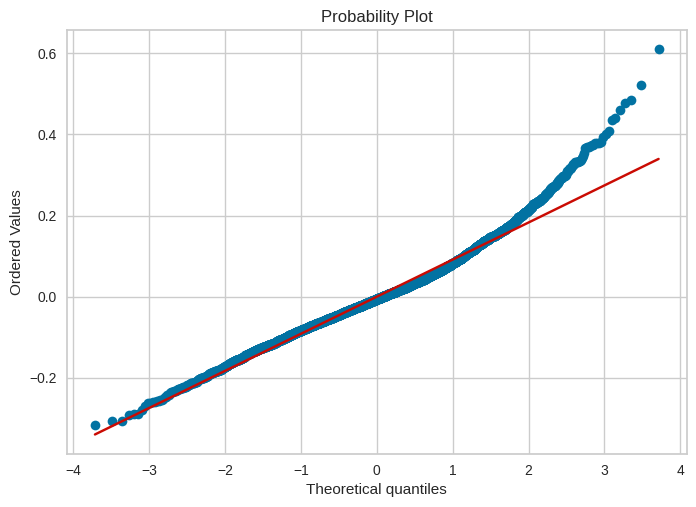

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

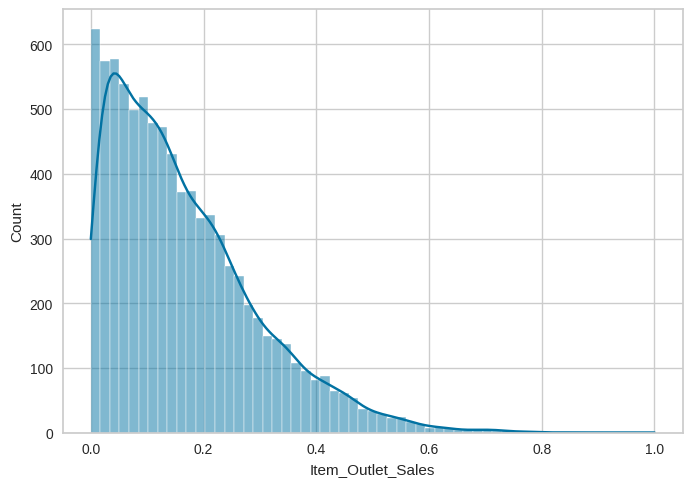

In [ ]:
sns.histplot(dfpd.Item_Outlet_Sales, kde = True)


# Ridge Regularization in H20
The main purpose of regression is to find patterns in this underlying dataset and generalize it to predict the corresponding target value for some new values of independent values. But sometimes target dataset is inflicted with some random noise. Although there may not be error for training set it will give huge errors in predicting the correct target values for test dataset.To avoid this condition regularization is used. Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. For this model, Ridge Regularization is used.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
house_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
house_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [ ]:
house_glm_regularization.train(x = X1, y = y1_numeric, training_frame = df1_train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708307476368_47


GLM Model: summary
    family    link      regularization            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Ridge ( lambda = 0.001 )  7                             7                              1                       py_15_sid_912b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.008288738829242926
RMSE: 0.09104251111015627
MAE: 0.0684976533290512
RMSLE: 0.07376261779570124
Mean Residual Deviance: 0.008288738829242926
R^2: 0.5129803431442141
Null degrees of freedom: 6843
Residual degrees of freedom: 6836
Null deviance: 116.48016204022915
Residual deviance: 56.728128547338585
AIC: -13361.885765711148

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance     training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  --------------------  ------------------  ------------------
    2024-02-19 02:46:06  0.000 sec   0             116.48016188694639         0.01701931062053571
    2024-02-19 02:46:06  0.025 sec   1                                                             0.09104251111015627  0.008288738829242926  0.0684976533290512  0.5129803431442141

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
Item_MRP              0.0739677              1                    0.430509
Outlet_Type           0.0507841              0.686572             0.295575
Outlet_Size           0.0151941              0.205416             0.0884333
Outlet_Identifier     0.0119018              0.160906             0.0692713
Outlet_Location_Type  0.0111543              0.1508               0.0649207
Item_Visibility       0.00600586             0.0811957            0.0349555
Item_Fat_Content      0.00280653             0.0379427            0.0163347

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:

#Model details without regularization
house_glm.train(x = X1, y = y1_numeric, training_frame = df1_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1708307476368_48


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              7                             7                              1                       py_15_sid_912b

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.008288725981597788
RMSE: 0.09104244055163387
MAE: 0.0685023803752807
RMSLE: 0.07376718487479775
Mean Residual Deviance: 0.008288725981597788
R^2: 0.5129810980305552
Null degrees of freedom: 6843
Residual degrees of freedom: 6836
Null deviance: 116.48016204022915
Residual deviance: 56.72804061805526
AIC: -13361.896374001903

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective            training_rmse        training_deviance     training_mae        training_r2
--  -------------------  ----------  ------------  -------------------------  -------------------  -------------------  --------------------  ------------------  ------------------
    2024-02-19 02:46:45  0.000 sec   0             116.48016188694639         0.01701931062053571
    2024-02-19 02:46:45  0.080 sec   1                                                             0.09104244055163387  0.008288725981597788  0.0685023803752807  0.5129810980305552

Variable Importances: 
variable              relative_importance    scaled_importance    percentage
--------------------  ---------------------  -------------------  ------------
Item_MRP              0.0740426              1                    0.43028
Outlet_Type           0.0509153              0.687649             0.295882
Outlet_Size           0.0152078              0.205393             0.0883764
Outlet_Identifier     0.011792               0.159259             0.068526
Outlet_Location_Type  0.0113112              0.152766             0.0657322
Item_Visibility       0.00600342             0.0810806            0.0348873
Item_Fat_Content      0.00280771             0.0379202            0.0163163

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

The accuracy and other related variables were same for both the cases: When dataset was regularized and when dataset was not regularized. This tells that for this specific model regularization does not help.

Calculating p-value and Z-value after regularization

In [ ]:
coeff_table = house_glm._model_json['output']['coefficients_table']

In [ ]:
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-0.012166,0.006636,-1.833232,6.681152e-02,0.164486
1,Item_Fat_Content,0.005880,0.002309,2.546616,1.089905e-02,0.002808
2,Item_Visibility,-0.038031,0.007142,-5.325056,1.041375e-07,-0.006003
3,Item_MRP,0.280773,0.004177,67.217094,0.000000e+00,0.074043
4,Outlet_Identifier,0.037333,0.007061,5.287260,1.280094e-07,0.011792
5,Outlet_Size,-0.046277,0.003902,-11.858889,3.990464e-32,-0.015208
6,Outlet_Location_Type,-0.027859,0.006203,-4.491012,7.205006e-06,-0.011311
7,Outlet_Type,0.192755,0.006695,28.791868,3.658757e-172,0.050915


# Data Report

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_3_AutoML_2_20240219_22936,0.0827322,0.00684462,0.0580595,0.0655712,0.00684462,859,0.067336,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_2_20240219_22936,0.0828082,0.00685719,0.0581613,0.0656461,0.00685719,398,0.021798,StackedEnsemble
StackedEnsemble_AllModels_1_AutoML_2_20240219_22936,0.0828487,0.0068639,0.0582126,0.0656744,0.0068639,447,0.086213,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_2_20240219_22936,0.0828532,0.00686465,0.0581963,0.0656901,0.00686465,536,0.080221,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_2_20240219_22936,0.0828636,0.00686638,0.0580931,0.0656753,0.00686638,346,0.055855,StackedEnsemble
StackedEnsemble_BestOfFamily_2_AutoML_2_20240219_22936,0.0828652,0.00686665,0.058219,0.0656884,0.00686665,435,0.09537,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20240219_22936,0.0828712,0.00686763,0.05823,0.0656947,0.00686763,297,0.010982,StackedEnsemble
GBM_1_AutoML_2_20240219_22936,0.082889,0.00687058,0.0580143,0.0656292,0.00687058,552,0.035458,GBM
GBM_grid_1_AutoML_2_20240219_22936_model_2,0.0829435,0.00687962,0.05803,0.0656841,0.00687962,298,0.022618,GBM
XGBoost_grid_1_AutoML_2_20240219_22936_model_13,0.0833976,0.00695516,0.0583645,0.0660705,0.00695516,436,0.00248,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

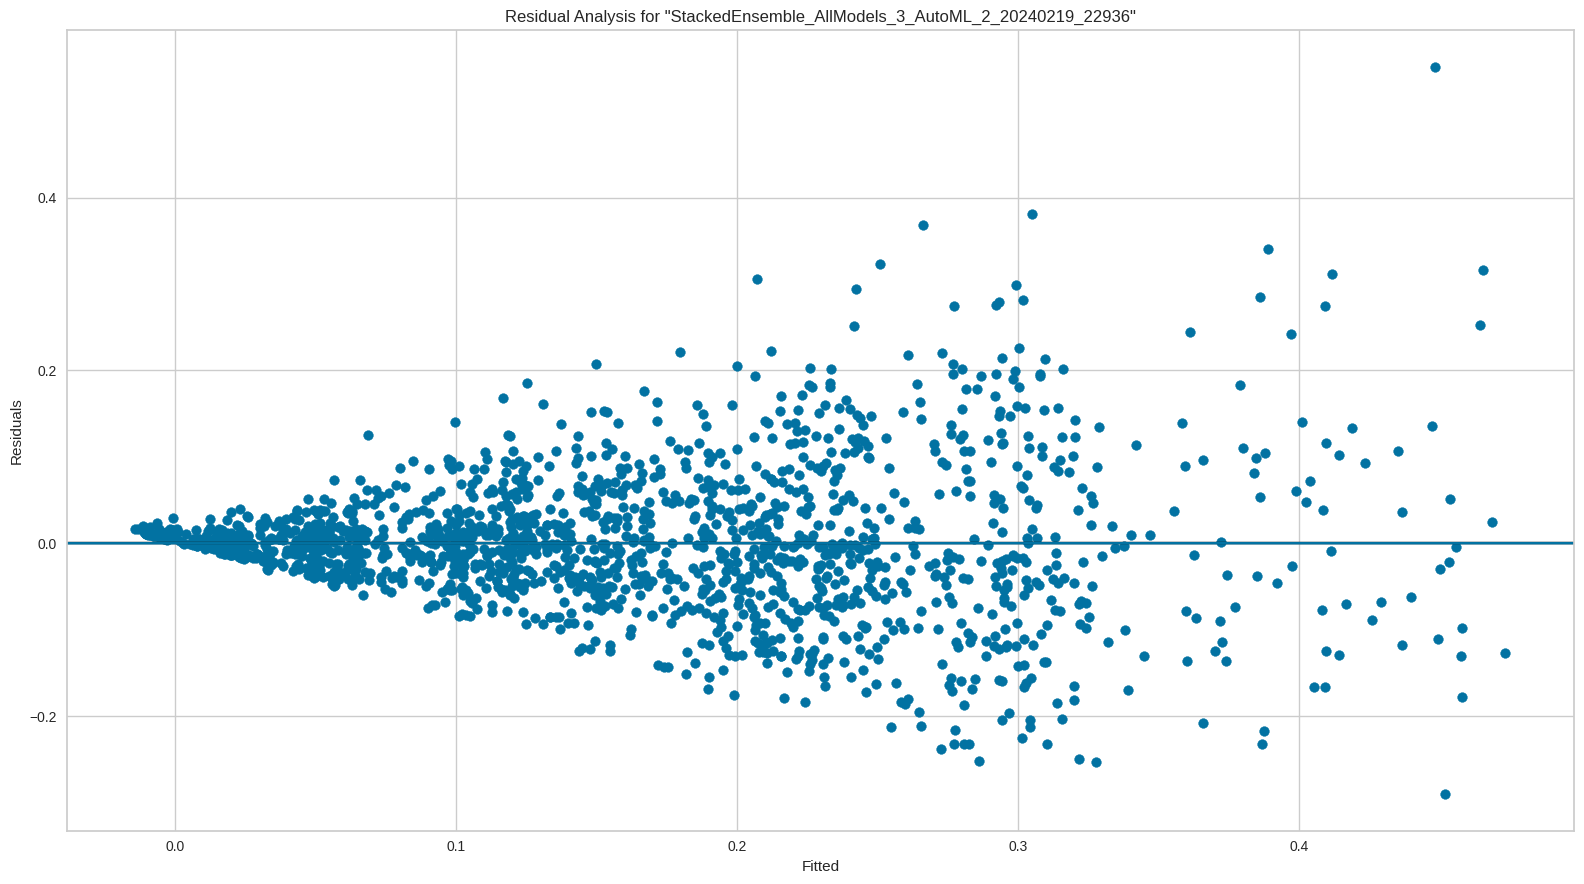

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

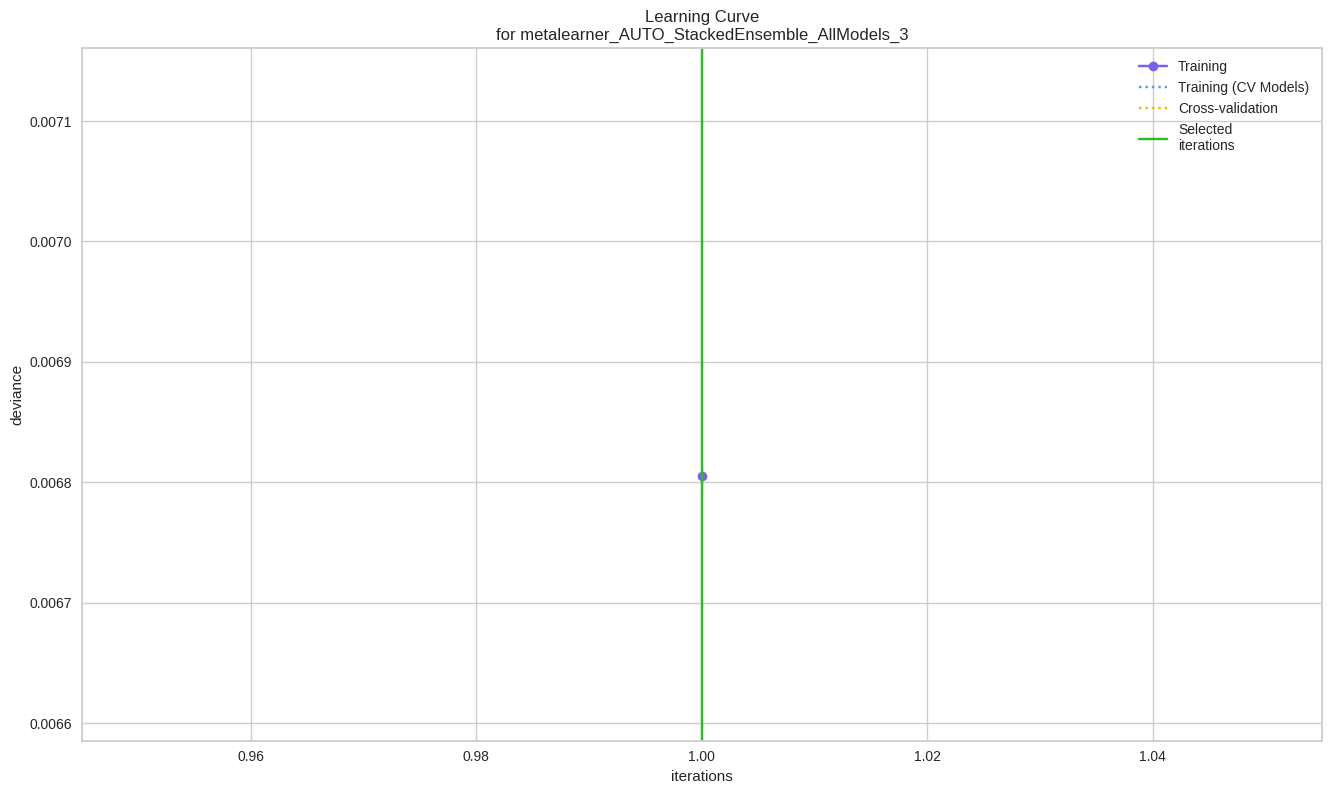

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

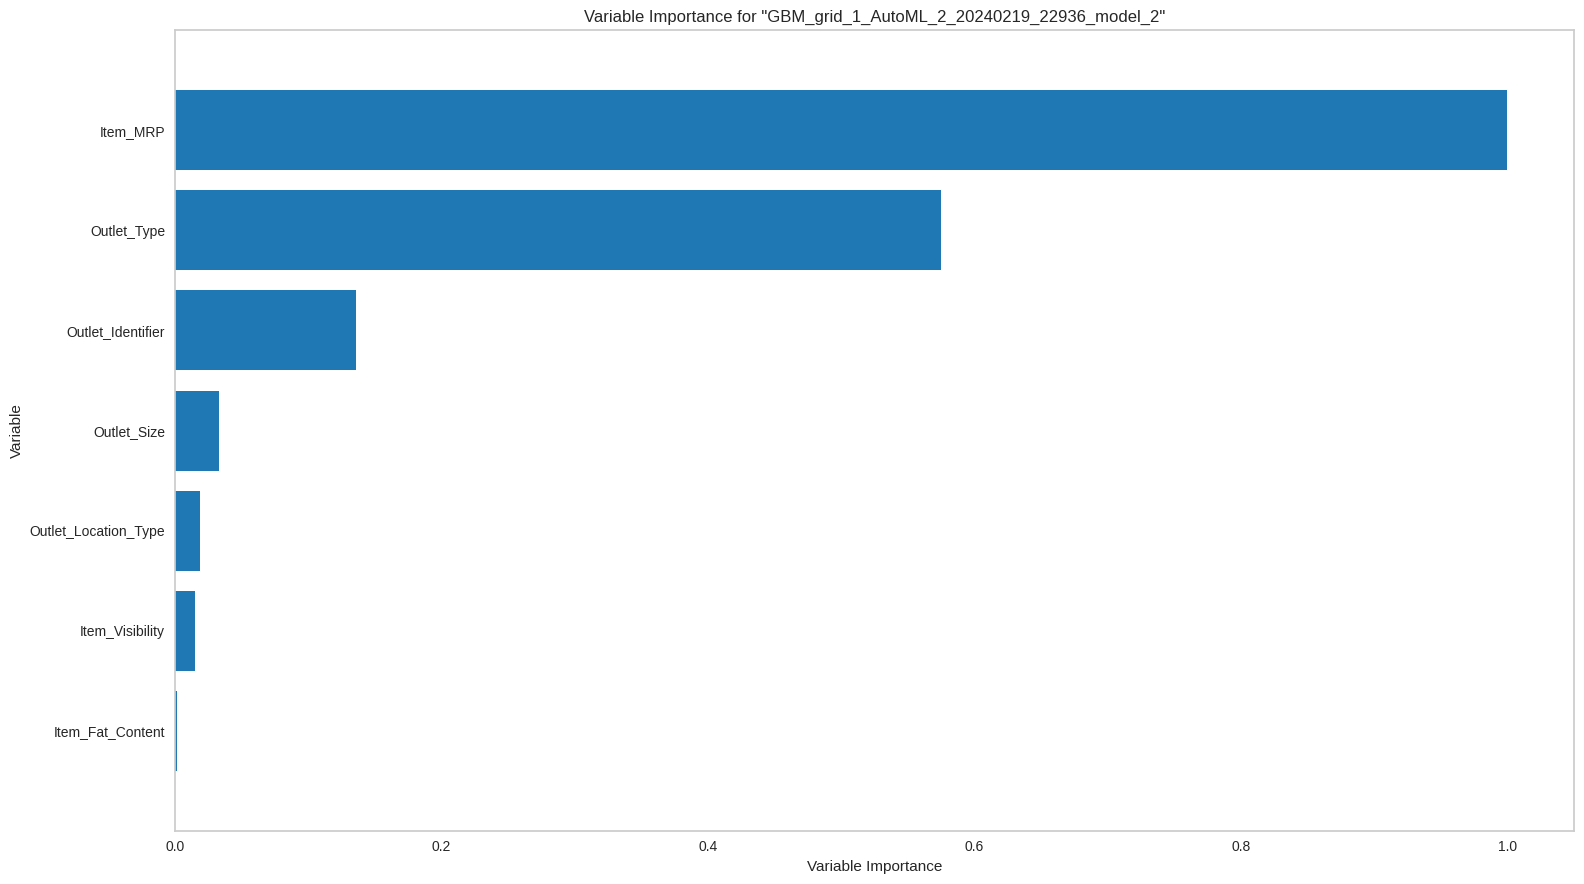

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

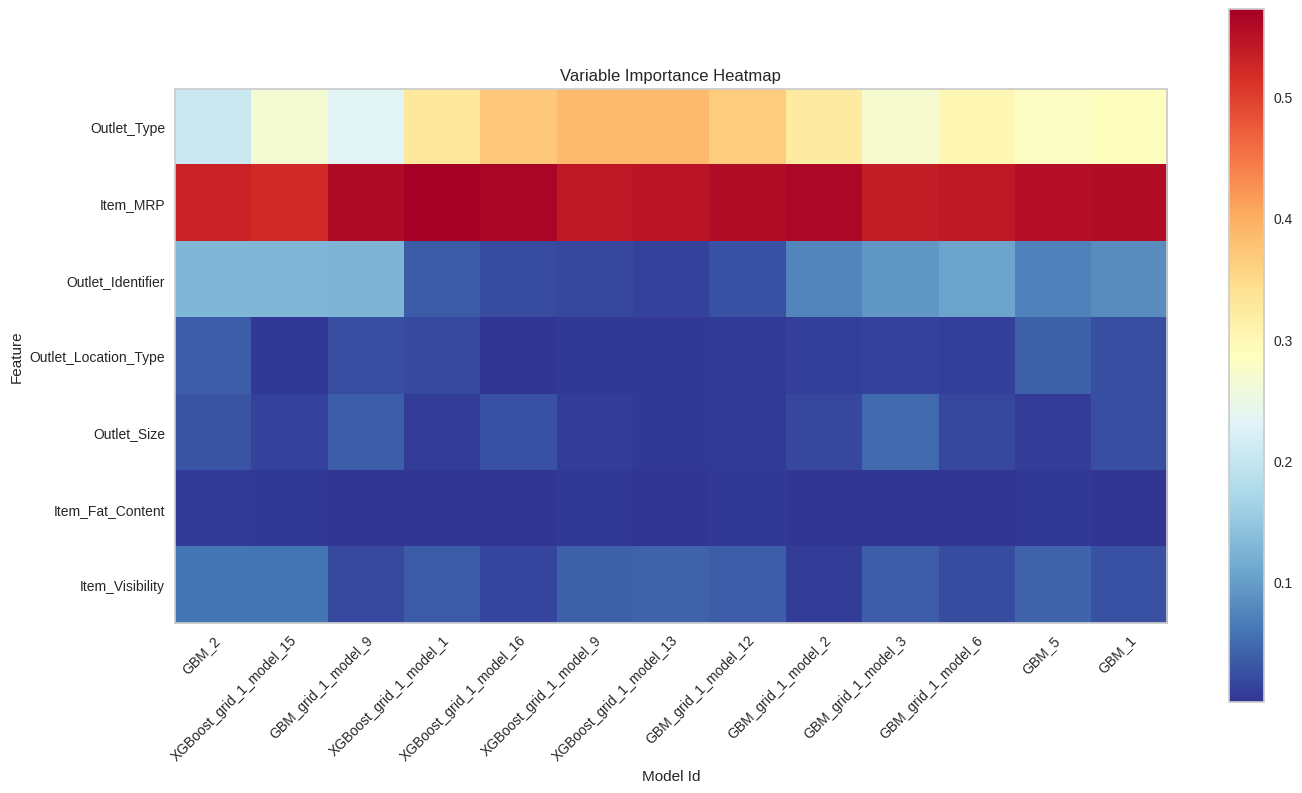

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

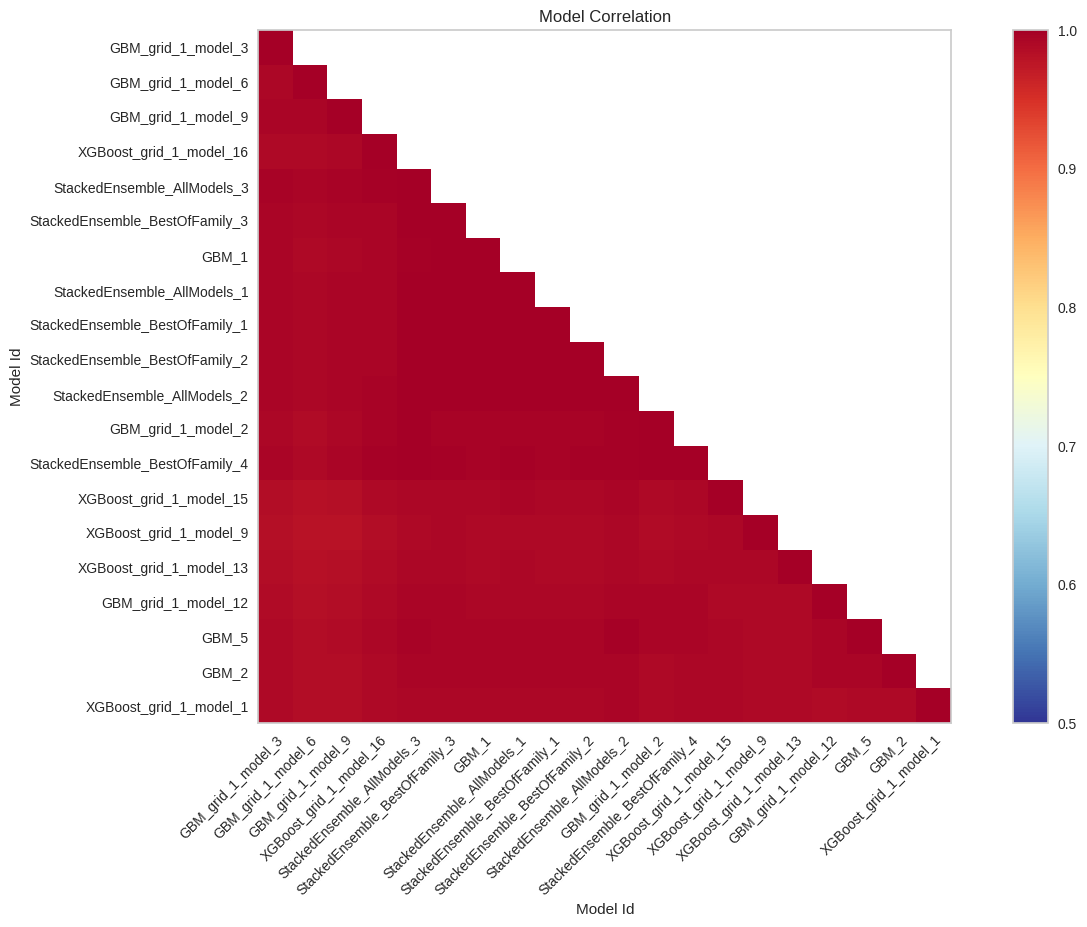

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

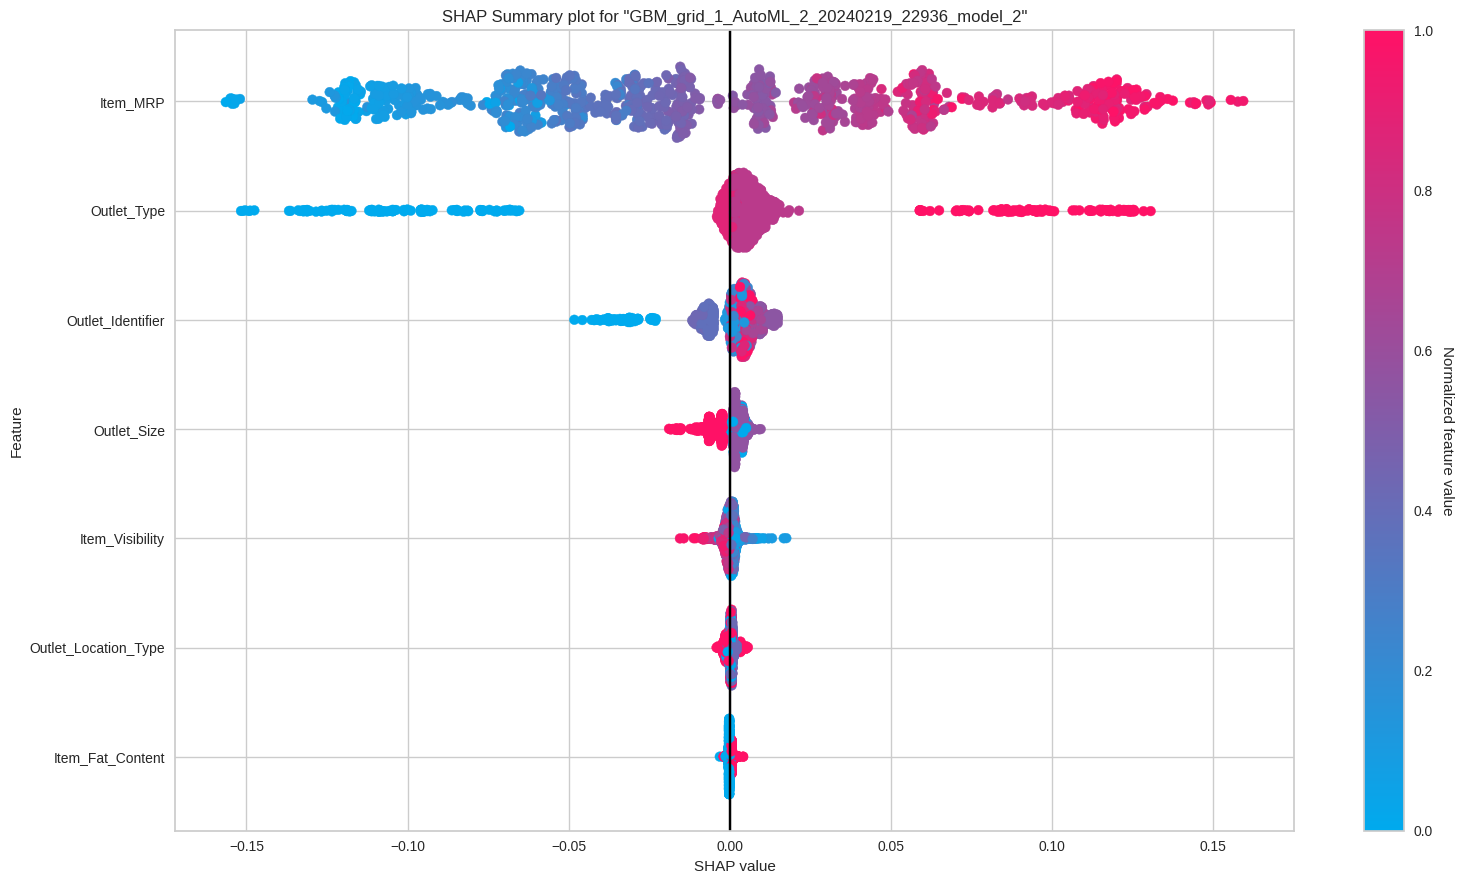

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

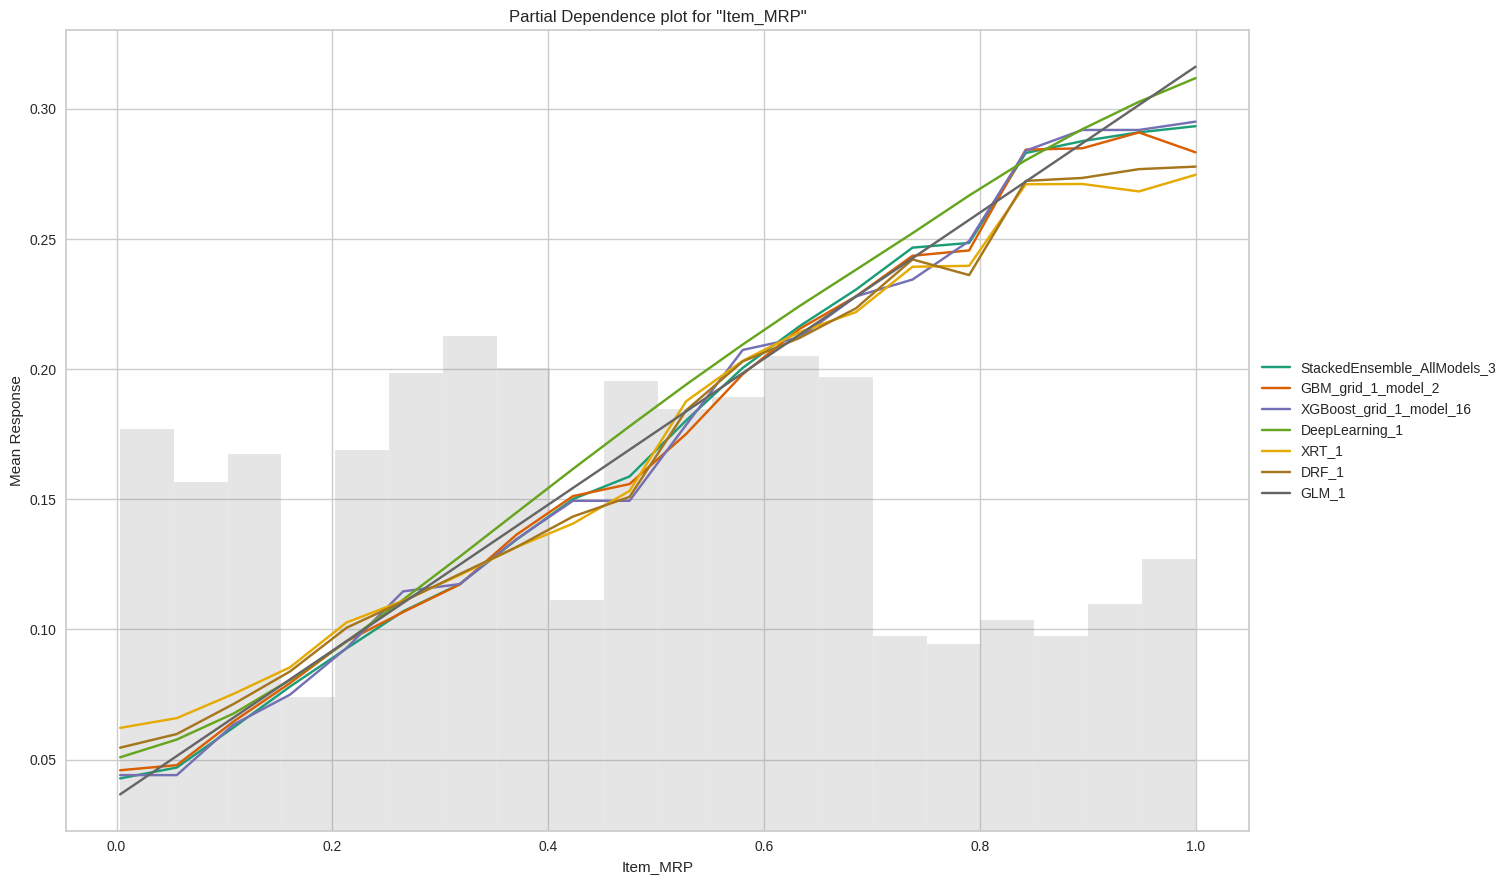

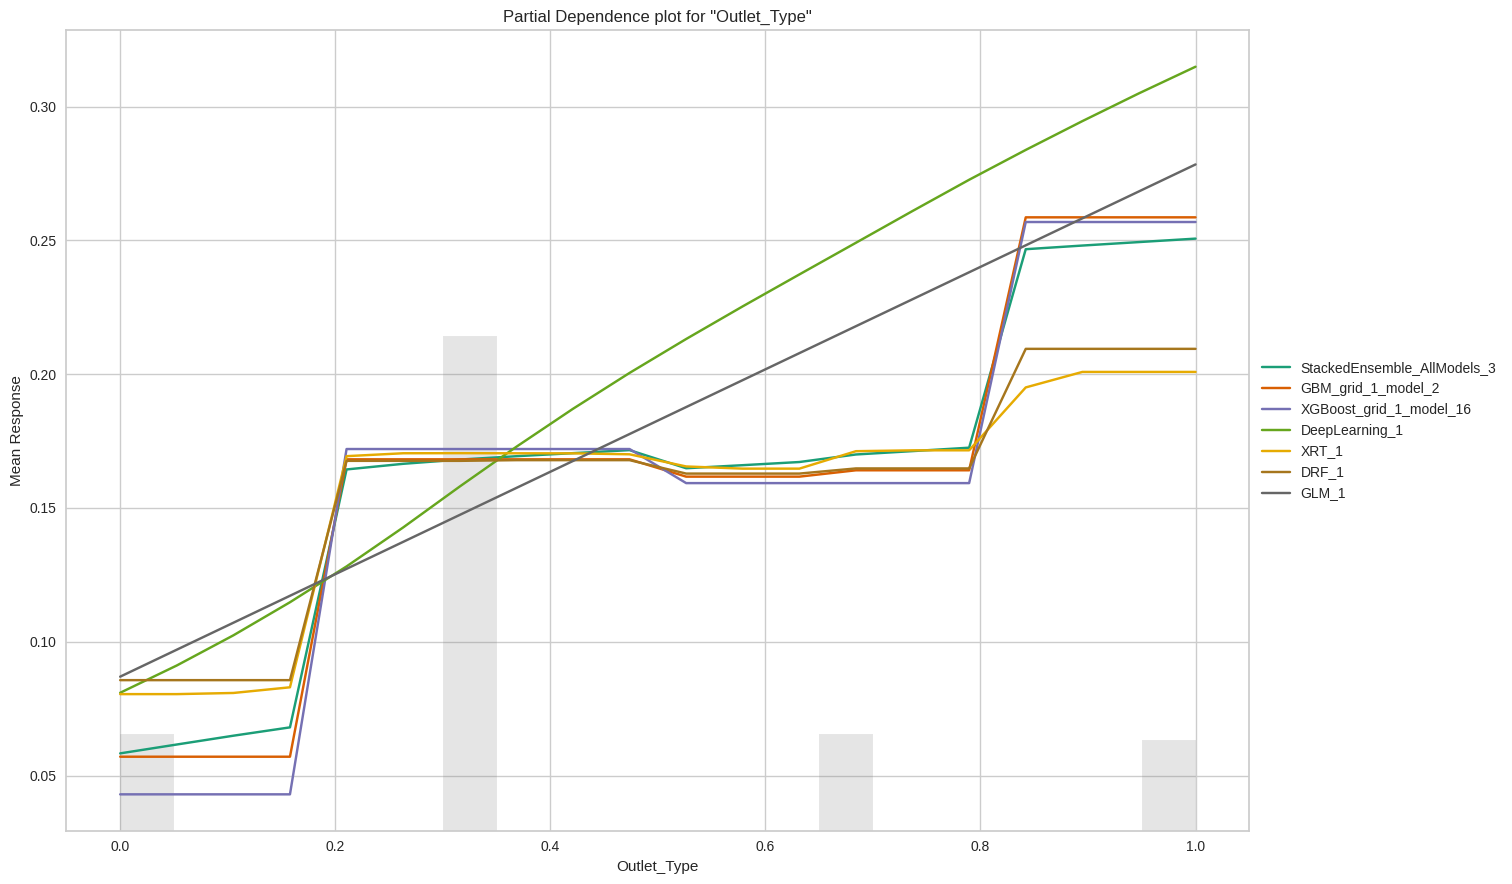

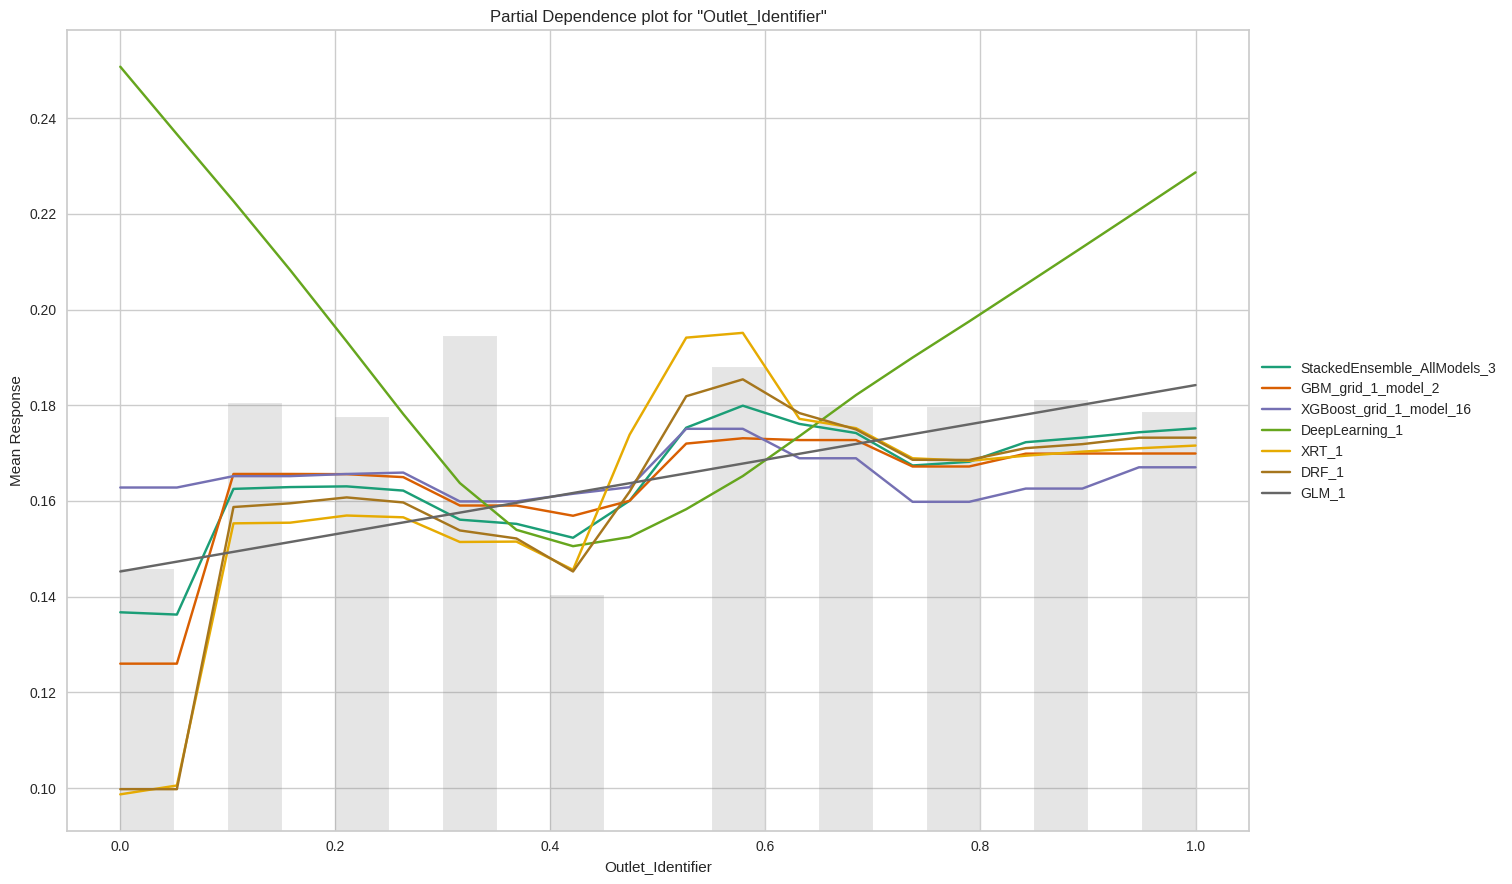

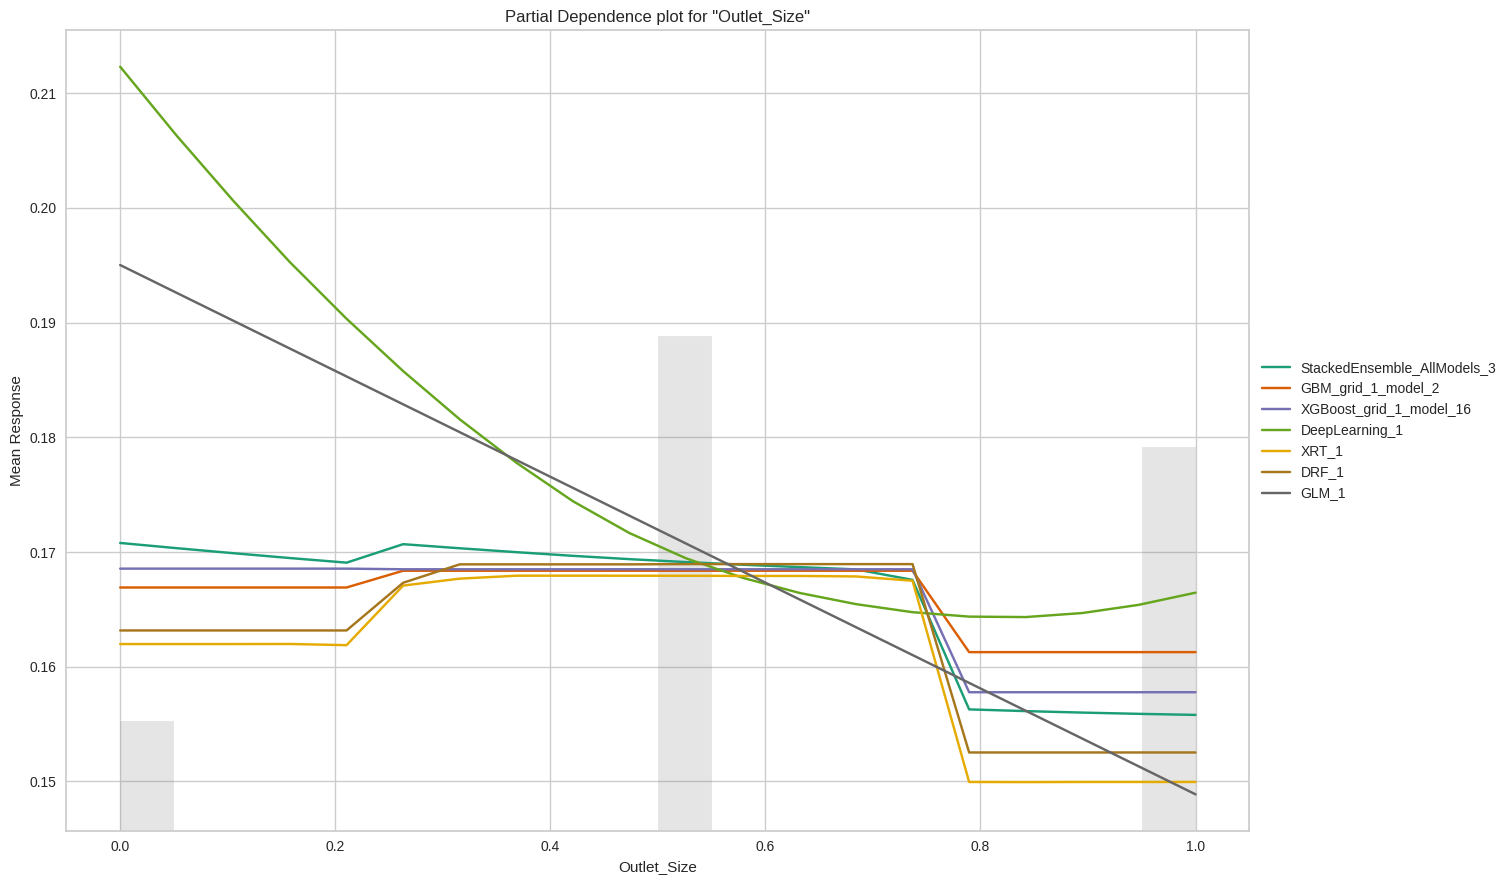

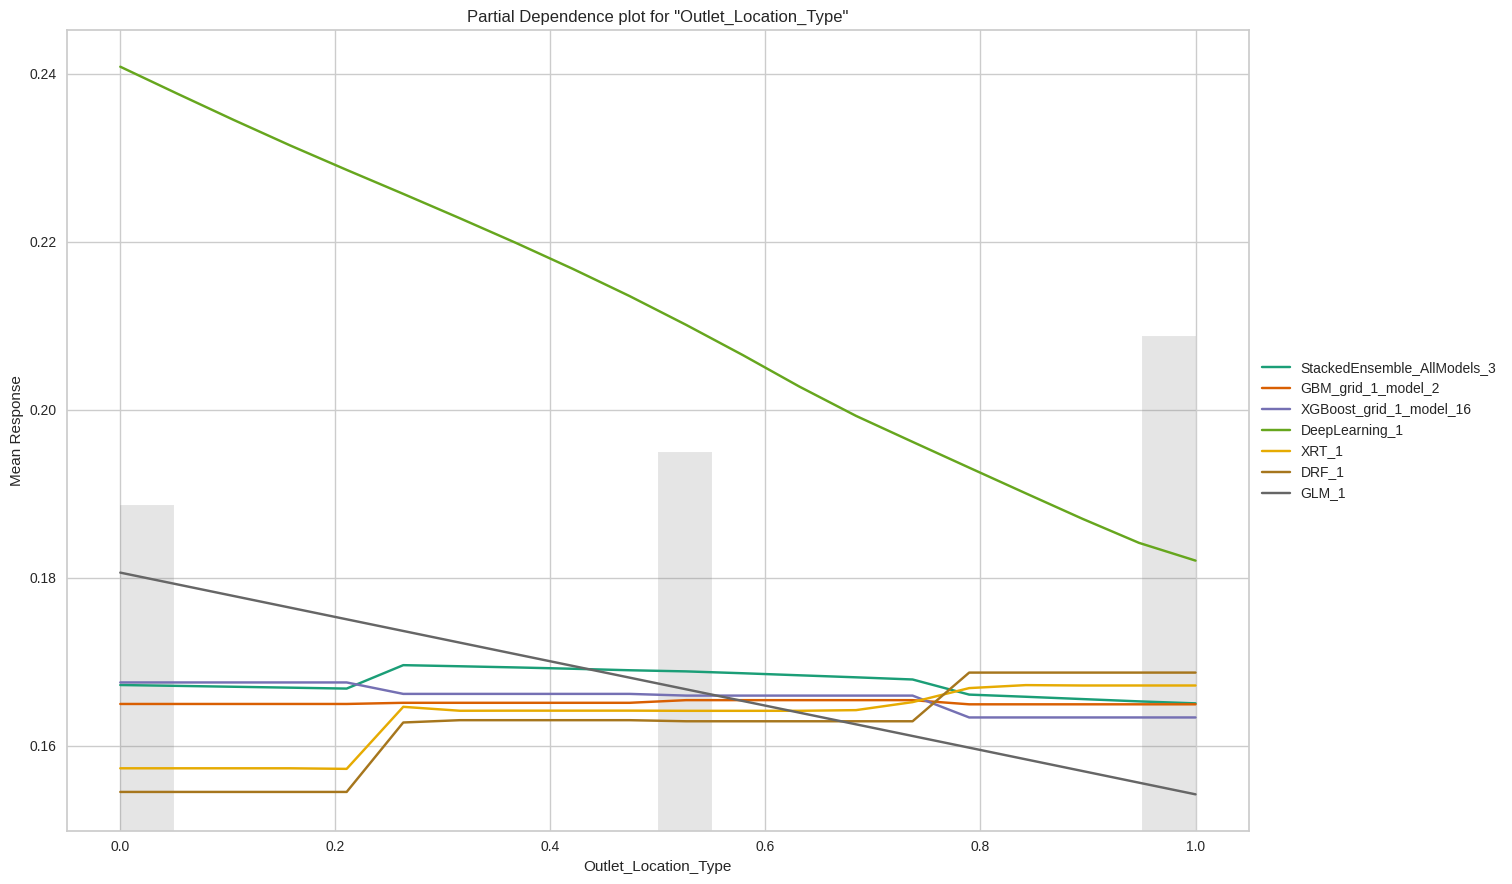

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

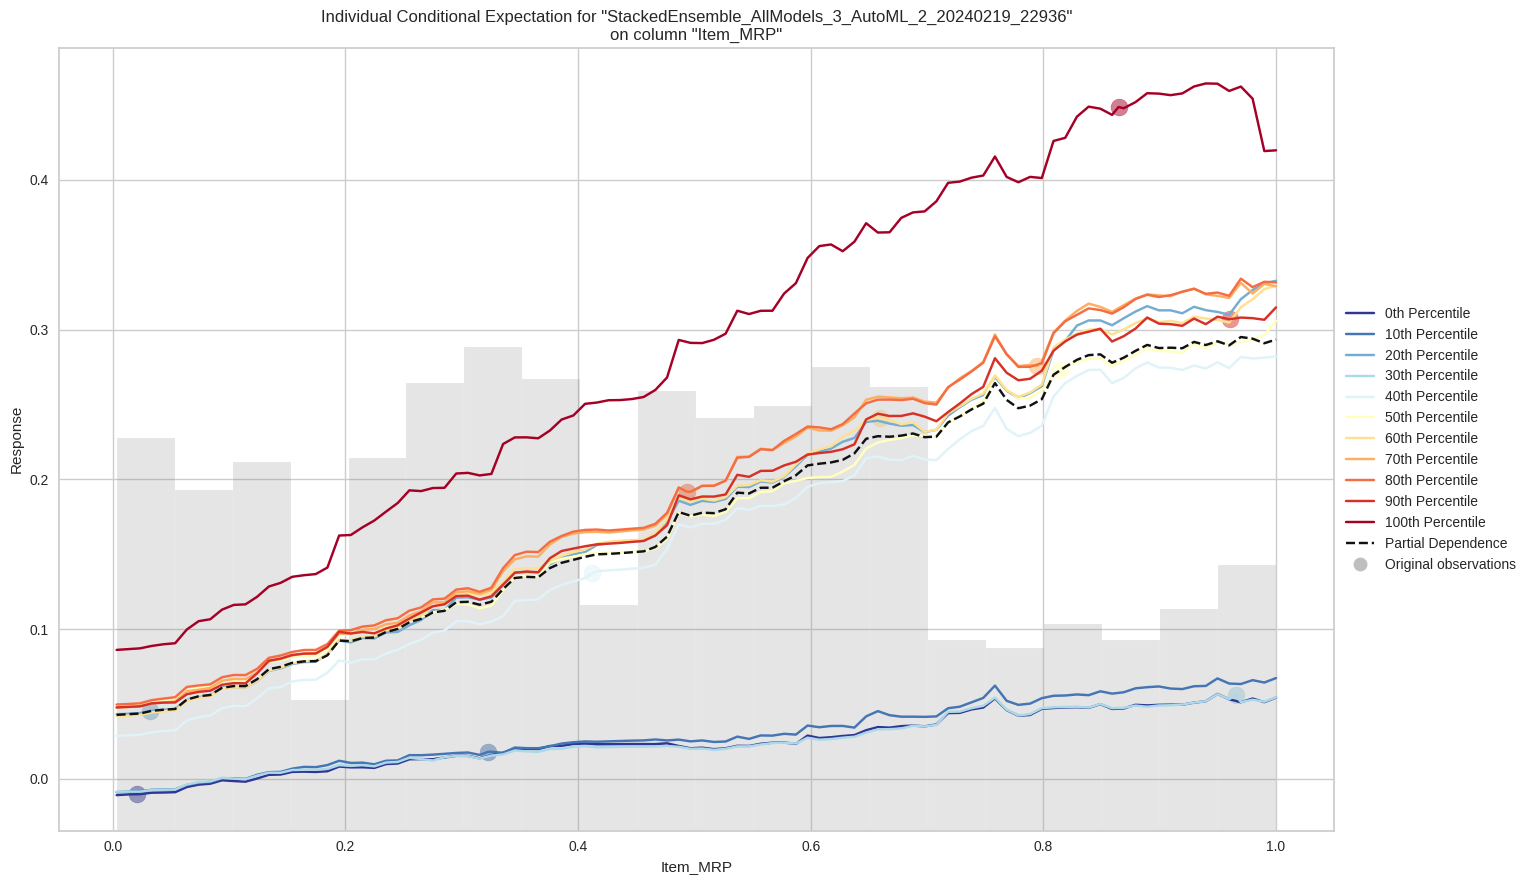

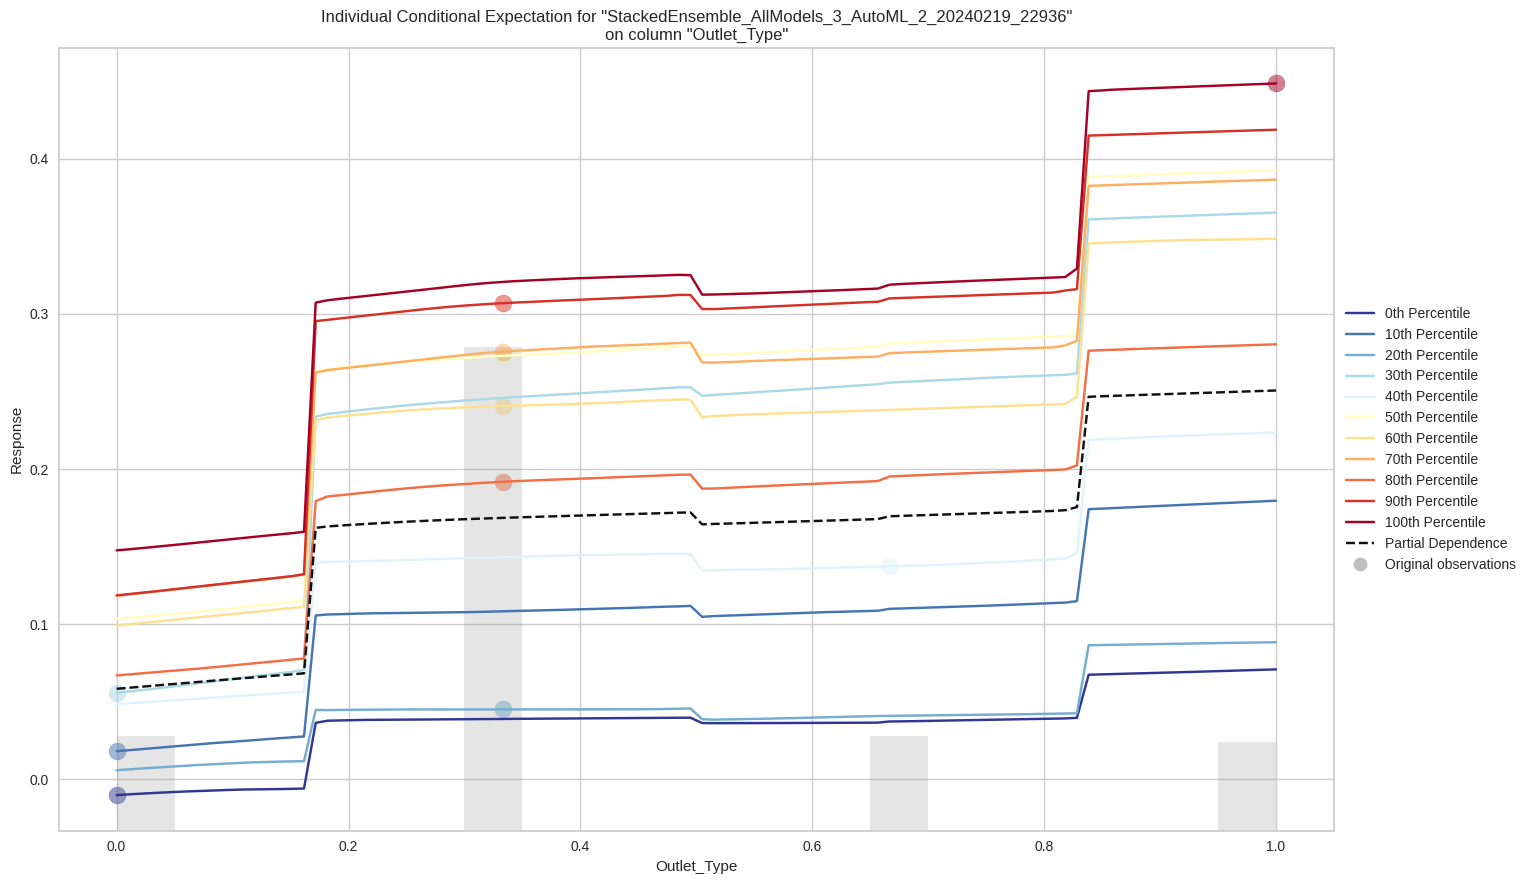

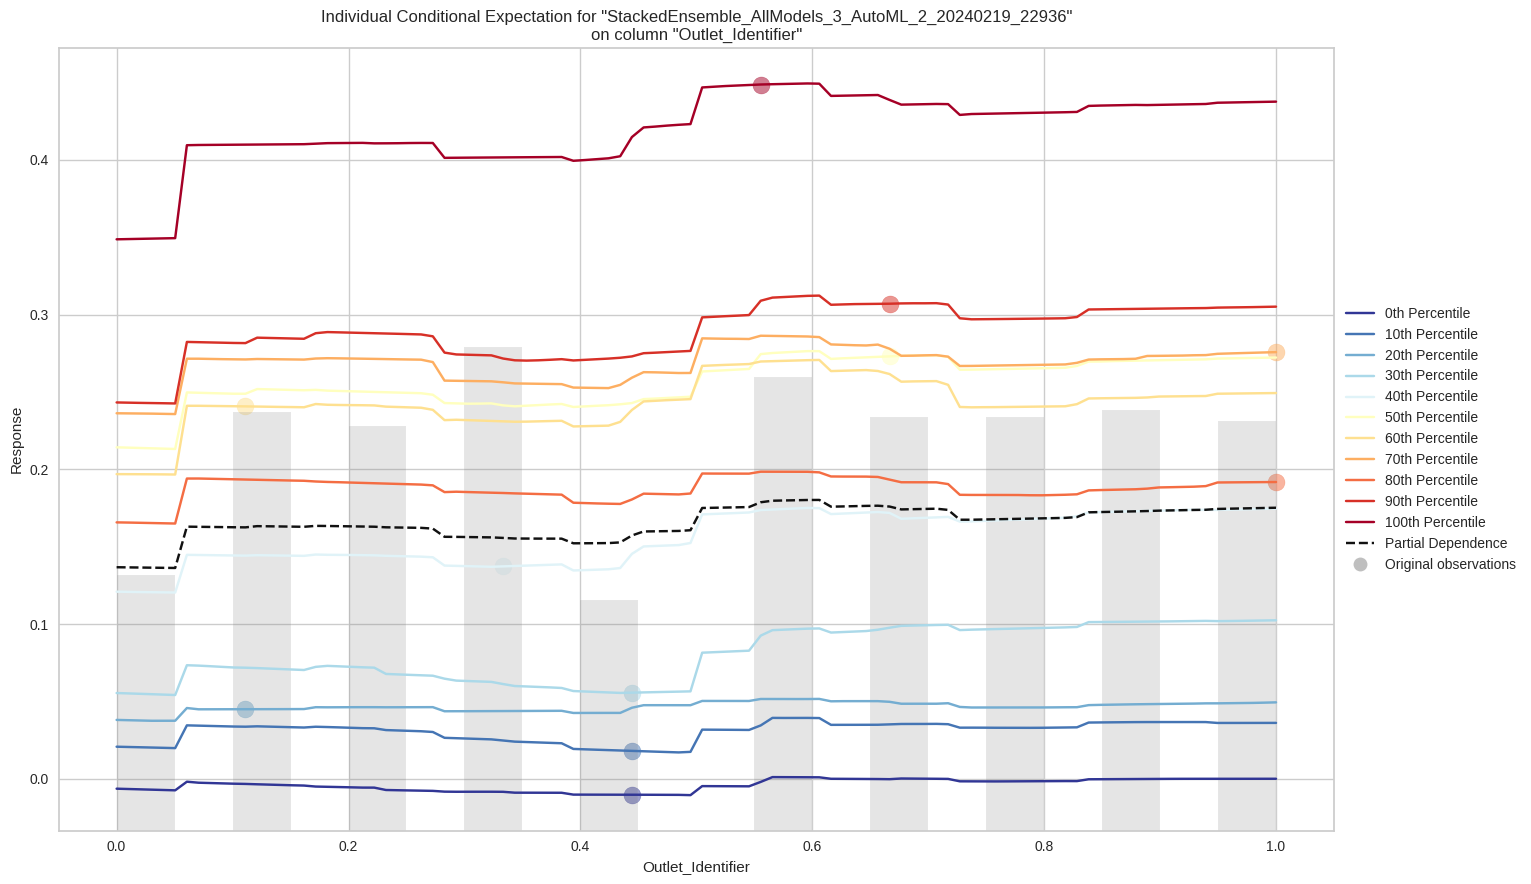

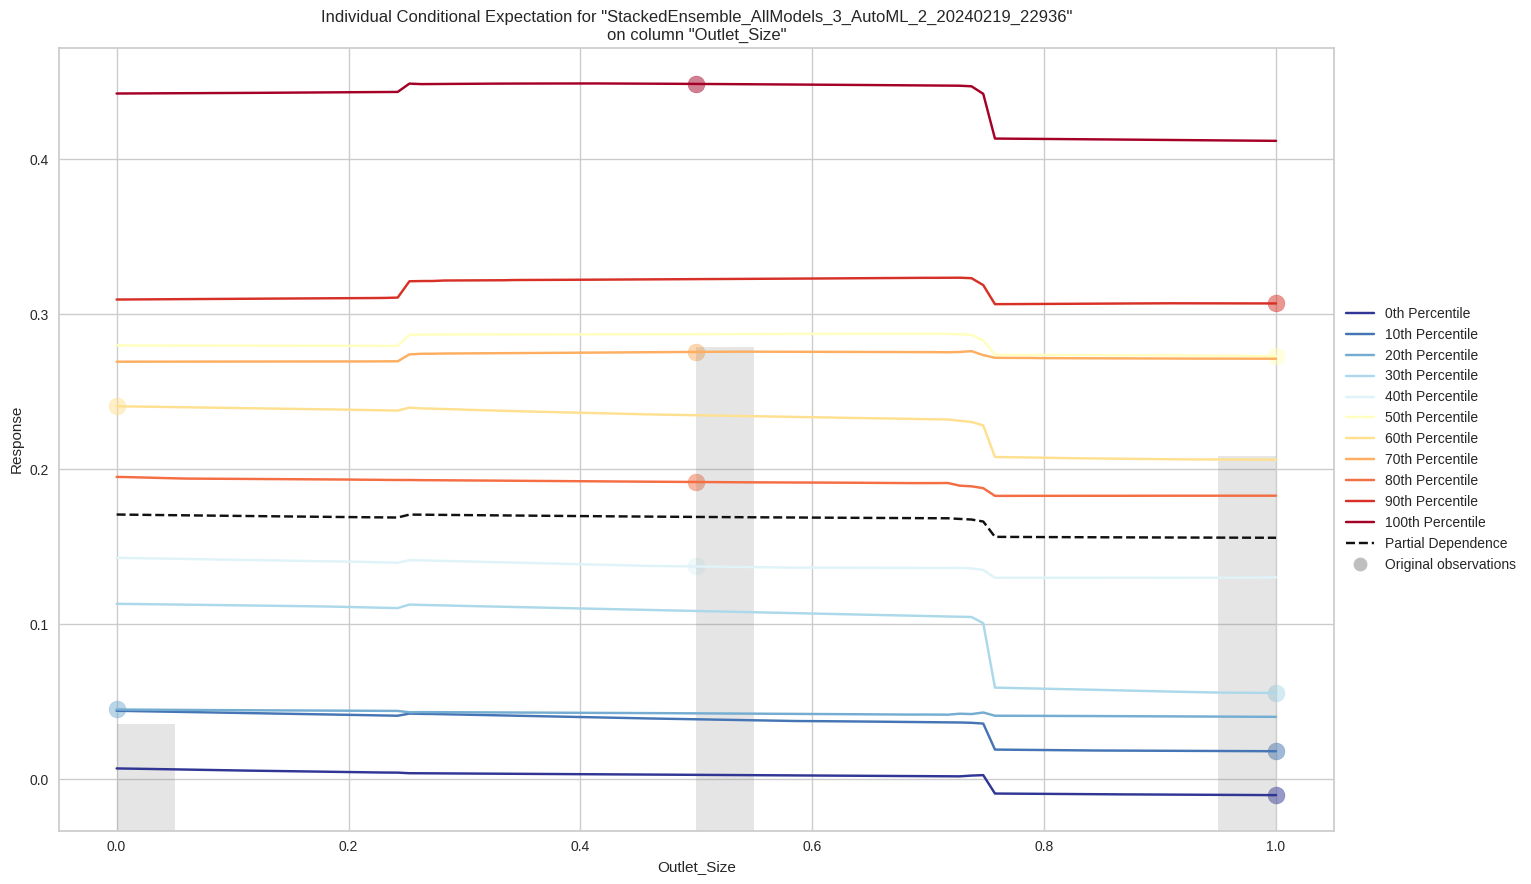

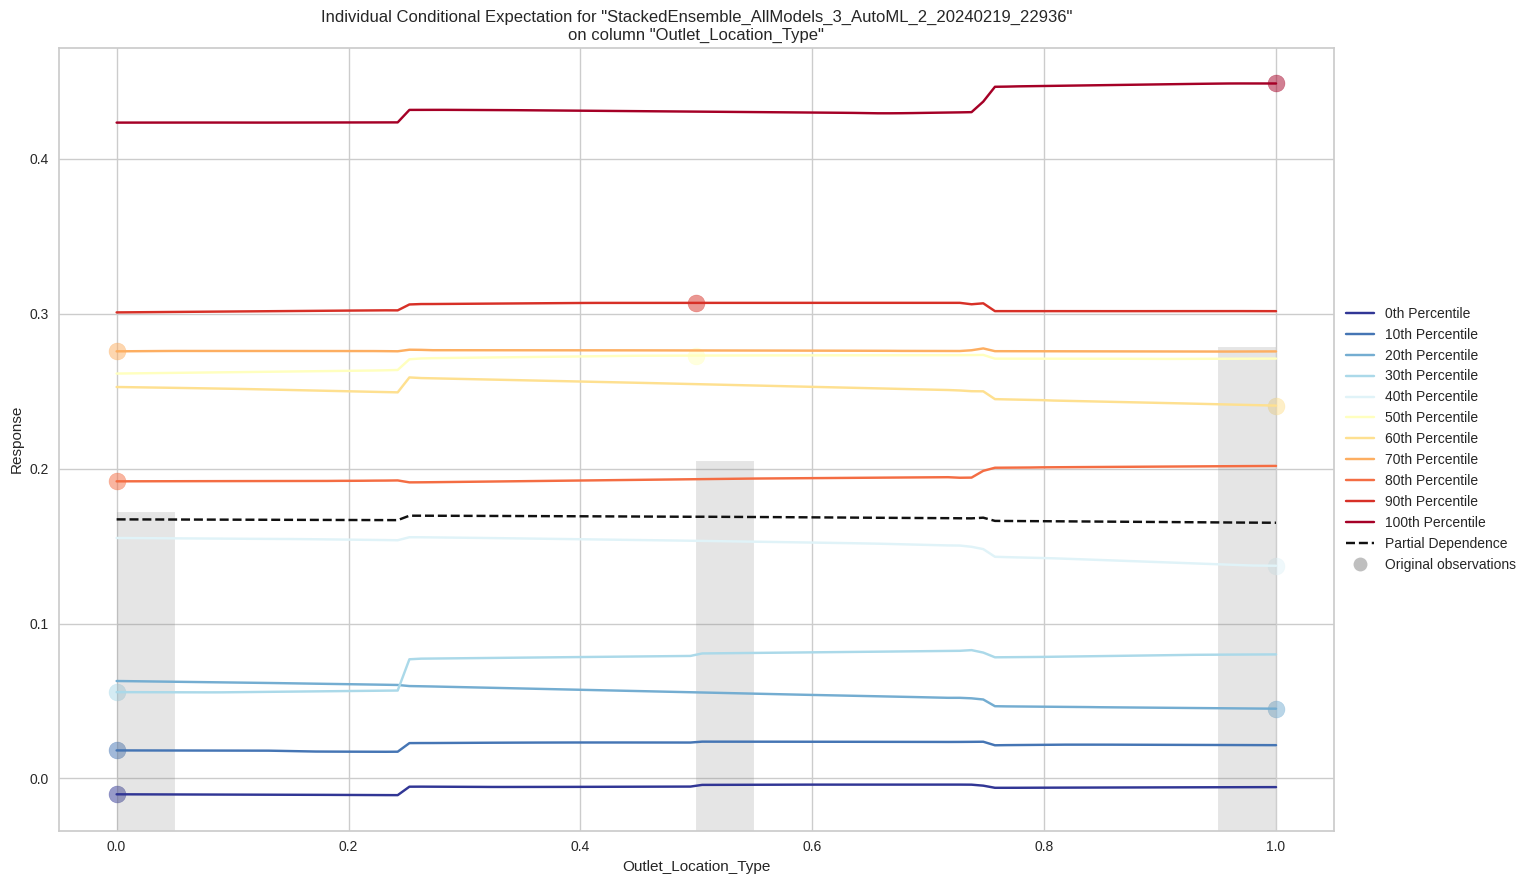

In [ ]:
exa = aml1.explain(df1_test)

# Hyperparameter Tuning
To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset.

In [ ]:
s = dfpd1['Item_Outlet_Sales']

t = dfpd1.drop(['Item_Outlet_Sales'], axis = 1)

In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV

In [ ]:
t_train, t_test, s_train, s_test = train_test_split (t, s, random_state = 101, test_size = 0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor

mode = RandomForestRegressor()

param_vals = {'max_depth': [200, 500, 800, 1100], 'n_estimators': [100,200, 300, 400], 'min_samples_split' : [2,3,5]

}

random_rf = RandomizedSearchCV(estimator=mode, param_distributions=param_vals,

n_iter=10, scoring='accuracy', cv=5,

refit=True, n_jobs=-1)

#Training and prediction



random_rf.fit(t_train, s_train)

preds = random_rf.best_estimator_.predict(t_test)

In [ ]:
random_rf.best_params_

{'n_estimators': 300, 'min_samples_split': 2, 'max_depth': 800}

# Conclusion

A fundamental algorithm based on the linear regression method to predict housing prices was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of Bigmart Sales. This gave the best model as ‘gbm’ and accuracy for test data was 60%. From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the Item Outlet Sales to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.

# Assignment Question/Answers

Q1) Is the relationship significant?

A relationship is said to be statistically significant when the p value for the variables is less than 0.05.P value is probability of obtaining a result at least as extreme as the current one, assuming null hypothesis is true. A small p value depicts that there is very little similarity between the two groups and hence null hypothesis can be ignored. P-value was calculated by two ways for this model. From the OLS method it was observed that values for 'Item_Weight' , 'Item_Type' , 'Outlet_Age' were greater than 0.05. So, it can be concluded that other that p-value for all the variables of dataset is less than 0.05. Hence for the chosen dataset it can be concluded that the relationship is significant.

Q2) Are any model assumptions violated?

Assumptions for linear regression are:

Linear relationship - The graph for dependent and independent variable needs to be linear by keeping other variables constant. When target variable is plotted against all other independent variables, linear relation is observed for few of them. Hence this assumption is not violated.

Homoscedasticity which means normality of the error distribution - The plot for residuals should be normally distributed i.e., it should form a bell-curve shape. For this model the same is achieved.

No or little multicollinearity - This can be determined by correlation matrix. For this model none of the assumptions are violated.
No autocorrelation can be determined with Durbin-Watson test. Values between 1.5 to 2.5 signifies no autocorrelation. For this model the value is 2.008, therefore this assumption is not violated.

Q3) Is there any multicollinearity in the model?

When one independent variable is related to another independent variable that is its highly correlated then multicollinearity exists in the model. It’s an issue as it undermines the statistical significance of an independent variable. Multicollinearity can be determined by computing correlation matrix or calculating VIF value of all variables. In correlation matrix a coefficient closer to +1 or -1 tells us that those two variables are highly correlated. For VIF values a value above 10 tells us that multicollinearity exists. In this model none of the variables had VIF value greater than 10 while few p value was greater than 0.05. By dropping those columns and rechecking the values expected output was achieved.

Q4) In the multivariate models are predictor variables independent of all the other predictor variables?

Variables are said to be independent when there is no relation between them. To check this relation, correlation matrix can be used. When correlation matrix is computed for the model, it can be observed that no features were related to each other. Other than those other predictors are independent from each other.

Q5)In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

From the variable importance plot, the most to least important variables are displayed. For my model Item_MRP, Outlet_type, Outlet_Identifier and Outlet_Size are top 4 most important variables to determine Item_outlet_Sales. VIF and p-values for 'Item_Weight' , 'Item_Type' , 'Outlet_Age' was high than the ideal values. So those variables were excluded from the model.

Q6) Does the model make sense?

For a model to make sense it should follow all the assumptions and have p value, VIF between their respective ranges. RMSE should be as low as possible considering the minimum and maximum values of the target variable. Other than that, R2 too is 0.60 which is considered good in terms of accuracy. So overall the model makes sense. To increase the accuracy, some additional variables can be dropped depending on their importance. Furthermore, outliers can be removed or boosting, or ensemble model can be used.

Q7)Does regularization help?

Regularization is a technique used for tuning the random noise function by adding an additional term to noise function. This additional term controls the excessively fluctuating function such that the coefficients don’t take extreme values and the prediction of target value for test data is not highly affected. The main use of Regularization is to minimize the validation loss and try to improve the accuracy of the model. For this model Ridge Regularization was used on training data. It was observed that Root Mean Square Error (RMSE) and R2 was calculated twice, once when regularization was not applied and once when regularization was applied. The values were same in both the cases. Hence it can be concluded that for this model regularization does not help.

Q8) Which independent variables are significant?

Variables are significant when p-value is less than 0.05. For this model except for 'Item_Weight' , 'Item_Type' , 'Outlet_Age' all other variables have p-value less than 0.05. So, it can be said that all variables are significant.

Q9) Which hyperparameters are important?

To find best set a hyperparameter and combinations of interacting hyperparameters for a given dataset hyperparameters tuning is used. It objectively searches different values for model hyperparameters and chooses a subset that results in a model that achieves the best performance on a given dataset. For this model tuning is performed using RandomForestRegressor. The best hyperparameters for this model are:- 'max_depth': 800, 'min_samples_split': 2 and 'n_estimators': 300

# LICENSE

MIT License

Copyright (c) 2024 Apoorv Dhaygude

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# REFERENCES

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/

Kaggle Notebook- https://www.kaggle.com/code/ranasabrii/sales-prediction

Dataset- https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data